In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv


# Summary of all PHUs

In [6]:
Data = np.zeros([34,365])
PHU_path = './../PHU_data'
files = os.listdir(PHU_path)

for ii in range(0,34):
  if ii < 9:
    target_name_part = "0"+str(ii+1)+"-"
  else:
    target_name_part = str(ii+1)+"-"
  for file in files:
      if target_name_part in file:
          target_file = file
          break
  else:
      raise FileNotFoundError(f"Could not find any file containing '{target_name_part}'.")

  filepath = os.path.join(PHU_path,target_file)
  Data[ii,:] = np.genfromtxt(filepath, delimiter=',')

population_by_phu = np.genfromtxt(f'{PHU_path}/population_by_phu.csv', delimiter=',')


In [7]:
import csv
phus = []
csv_file_path = f'{PHU_path}/phu_list.csv'

with open(csv_file_path, mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)
    # Iterate through the rows and append the first column to the list
    for row in csv_reader:
        if row:  # Ensure the row is not empty
            phus.append(row[0])

# Print PHUs with numbering
for idx, phu in enumerate(phus, start=0):
    print(f"{idx}\t{phu}")

0	Algoma
1	Brant
2	Chatham-Kent
3	DurhamRegional
4	EasternOntario
5	GreyBruce
6	Haldimand-Norfolk
7	Haliburton
8	HaltonRegional
9	Hamilton
10	Hastings and PrinceEdward Counties
11	HuronPerth
12	Kingston
13	Lambton
14	Leeds
15	Middlesex-London
16	NiagaraRegionalArea
17	NorthBayParrySound
18	Northwestern
19	Ottawa
20	Oxford Elgin St.Thomas
21	Peel Regional
22	Peterborough County-City
23	Porcupine
24	Renfrew County and District
25	Simcoe Muskoka District
26	Sudbury and District
27	ThunderBay District
28	Timiskaming
29	City of Toronto
30	Waterloo
31	Wellington-Dufferin-Guelph
32	Windsor-EssexCounty
33	York Regional


/var/folders/lr/4h04vl_92s3d0hrwg37l8g740000gn/T/ipykernel_30820/1452315583.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(1, figsize=(5,3))


<Figure size 640x480 with 0 Axes>

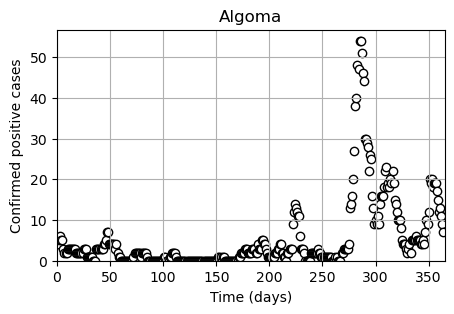

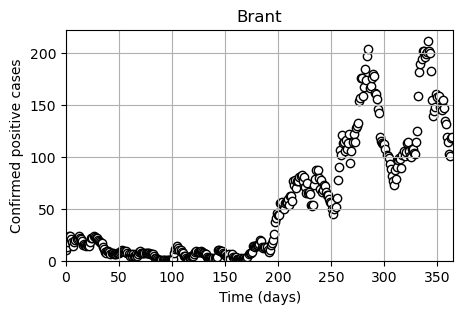

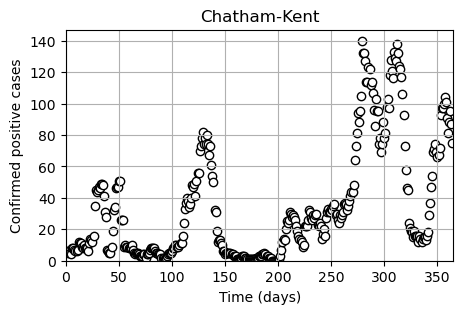

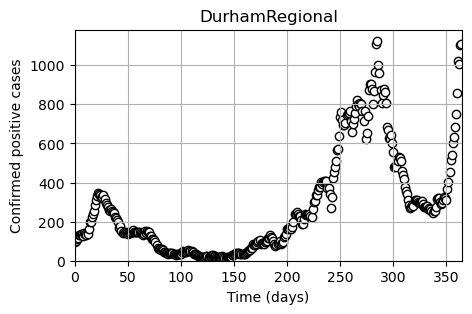

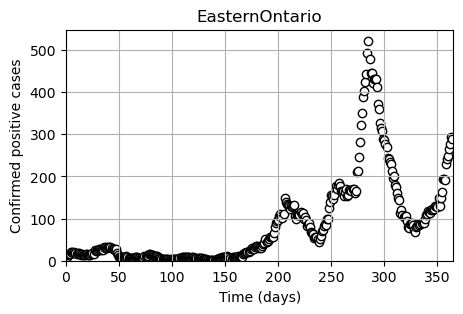

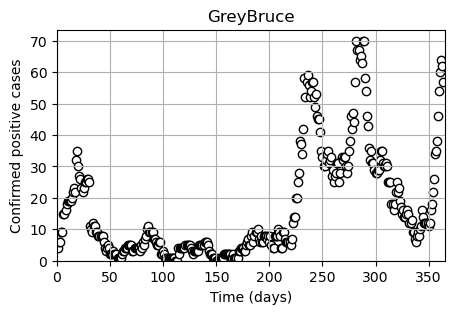

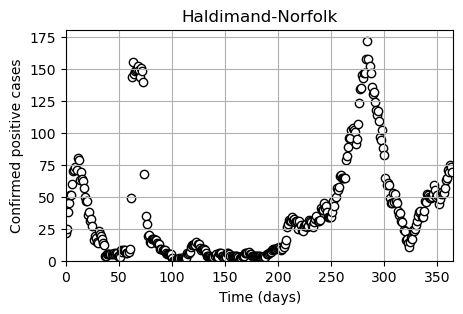

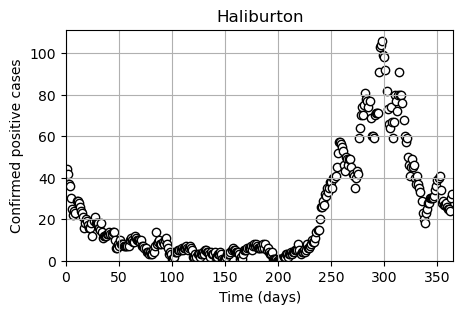

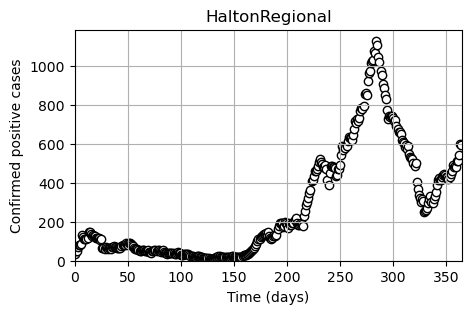

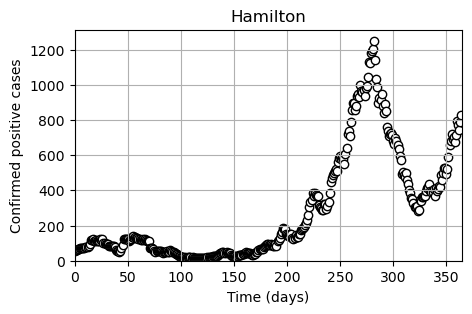

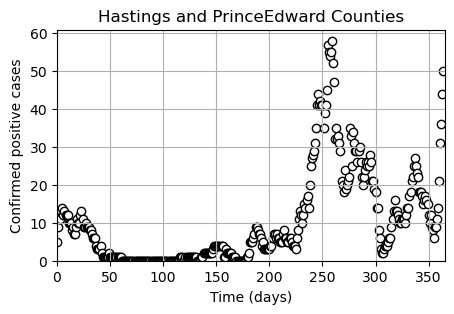

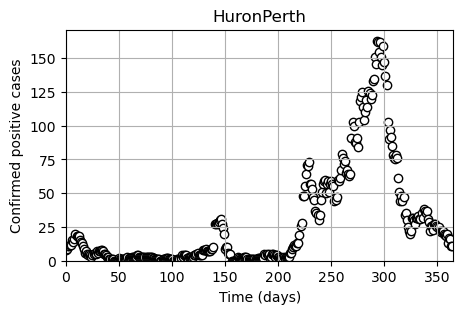

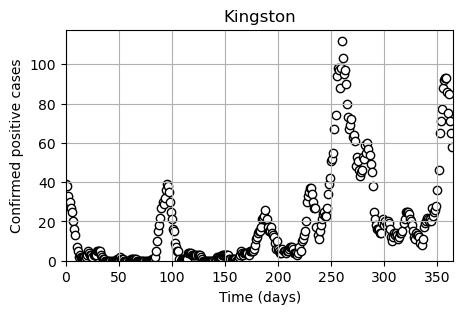

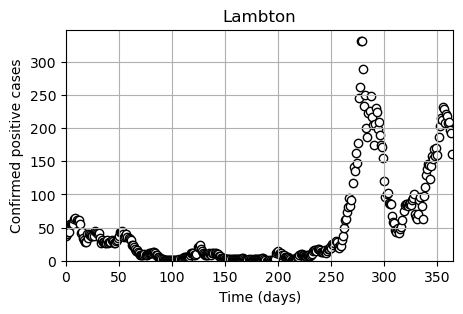

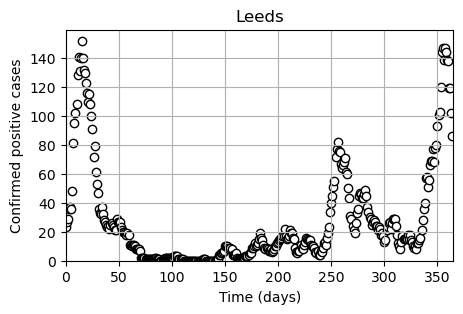

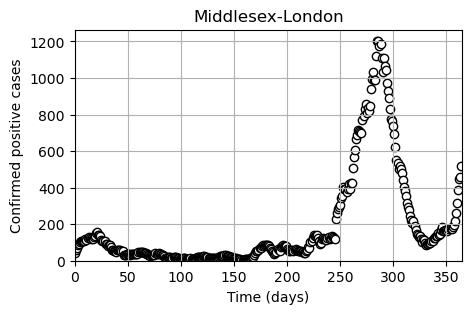

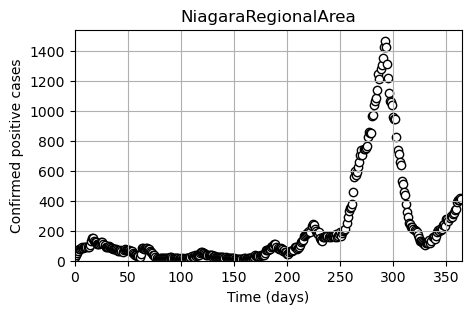

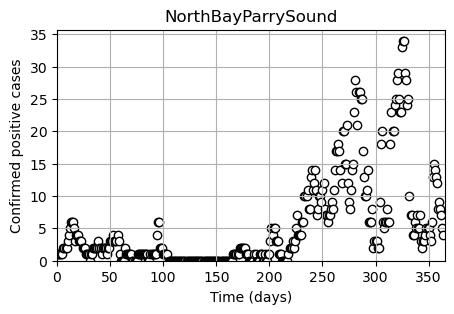

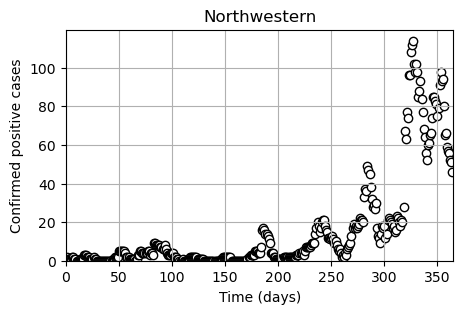

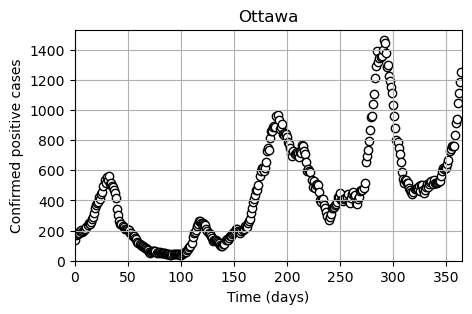

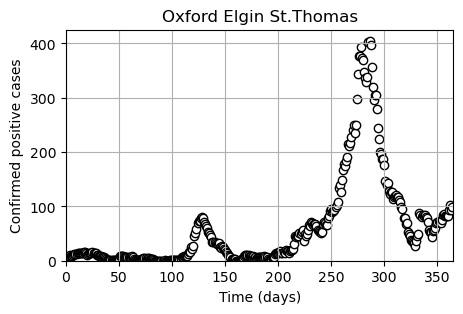

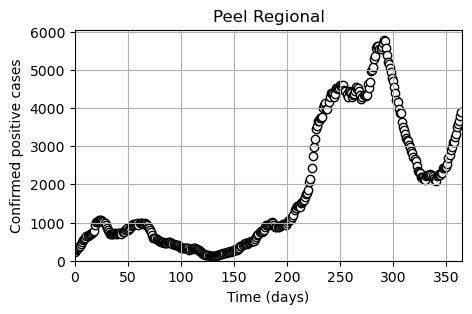

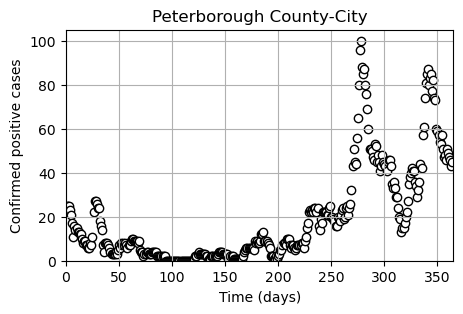

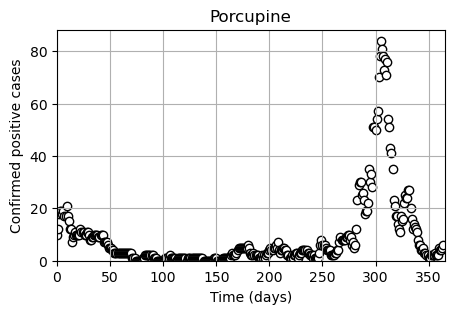

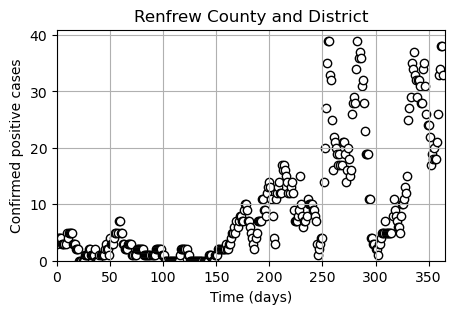

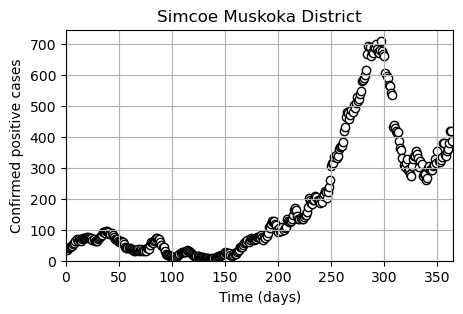

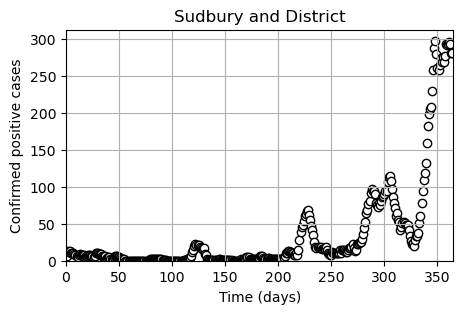

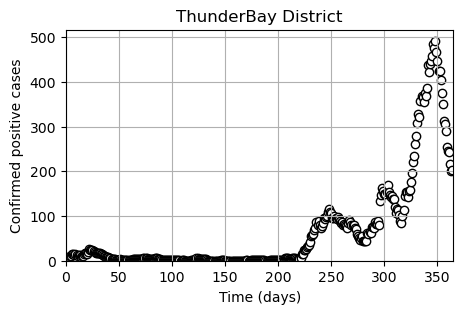

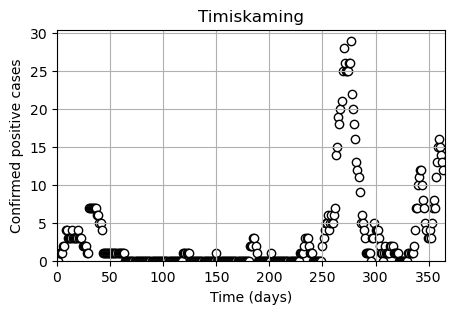

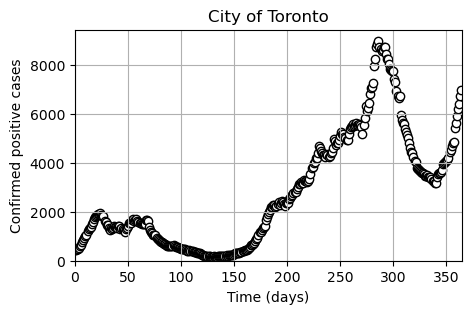

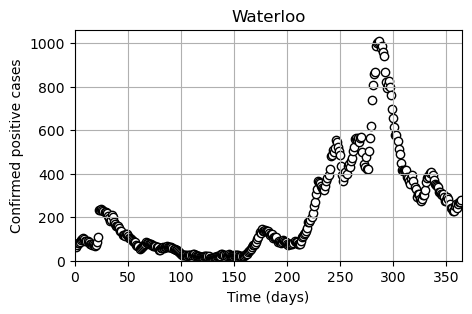

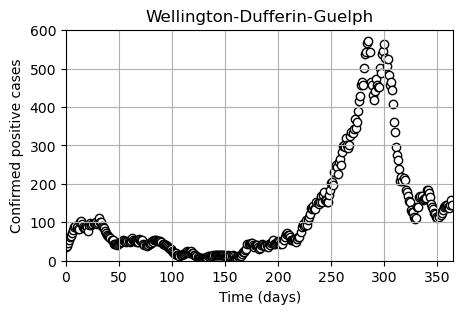

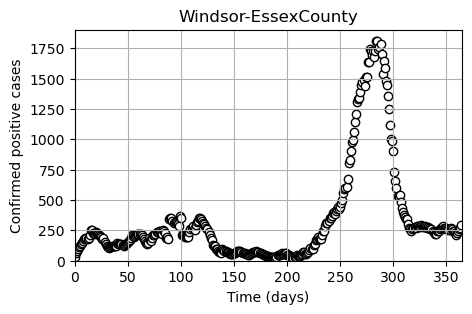

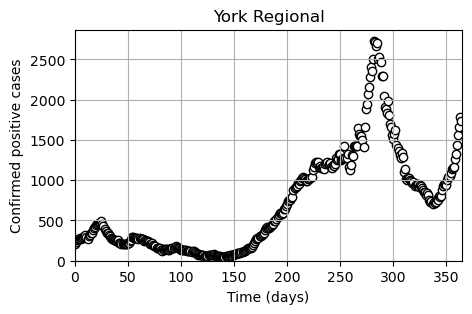

In [8]:
Ndays = 365
tdata = np.arange(0,Ndays)

for ii in range(34):
  yobs = Data[ii,:]
#   np.savetxt('dat/data'+str(ii+1)+'.dat',yobs/population_by_phu[ii,1])

  # Population of Ontario 2020 14,726,000
  plt.figure(ii)
  f, ax = plt.subplots(1, figsize=(5,3))
#   plt.scatter(tdata,yobs,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
  plt.scatter(tdata,yobs,color='w',edgecolors='k',zorder=1,alpha=1,label='Data')
  plt.grid(True)
  plt.xlim([0,Ndays])
  plt.ylim(bottom=0)
  plt.title(phus[ii])
  plt.xlabel('Time (days)', fontsize=10)
  plt.ylabel(r'Confirmed positive cases', fontsize=10)
#   plt.savefig(f'data_{phu[ii]}.pdf',bbox_inches='tight')



